Analysis

    - Temperature seems to be highest among 20 to 30 degrees of latitude.
    - In most of the cities within -10 to 10 degrees of latitude, the humidity is above 50%
    - Cloudiness and wind speed doesn't really have any relationship with the latitude.

In [19]:
import openweathermapy as owm
import pandas as pd
import numpy as np
from config import api_key
from citipy import citipy
import random
import matplotlib.pyplot as plt

In [8]:
#Create list of random cities.

settings = {"units": "imperial", "appid": api_key}
city_list = []
weather_data= []
while len(weather_data)<500:
    r_lat = round(random.uniform(-90, 90),2)
    r_lng = round(random.uniform(-180, 180),2)
    city = citipy.nearest_city(r_lat,r_lng).city_name
    if not city in city_list:
        city_list.append(city)
        try:
            data = owm.get_current(city, **settings)
            weather_data.append(data)
            print(f"processing {city},{len(weather_data)}")
        except:
            pass

processing kruisfontein,1
processing yellowknife,2
processing zyryanka,3
processing la roda,4
processing woodland,5
processing ushuaia,6
processing mataura,7
processing cabo san lucas,8
processing avarua,9
processing jamestown,10
processing gariaband,11
processing kapaa,12
processing punta arenas,13
processing oktyabrskoye,14
processing whitefish,15
processing henties bay,16
processing pechenga,17
processing samur,18
processing rikitea,19
processing faya,20
processing kimbe,21
processing aklavik,22
processing ilulissat,23
processing sao filipe,24
processing provideniya,25
processing lebu,26
processing bethel,27
processing poum,28
processing evensk,29
processing victor harbor,30
processing castro,31
processing tuktoyaktuk,32
processing lavrentiya,33
processing taoudenni,34
processing fairbanks,35
processing vila velha,36
processing bambous virieux,37
processing batamshinskiy,38
processing cabedelo,39
processing hilo,40
processing chilca,41
processing diamantino,42
processing tiznit,43
p

processing pital,344
processing eregli,345
processing karratha,346
processing caravelas,347
processing raudeberg,348
processing port-cartier,349
processing grande prairie,350
processing bubaque,351
processing anadyr,352
processing sovetskiy,353
processing northam,354
processing lanxi,355
processing livingston,356
processing lima,357
processing pitkyaranta,358
processing vestmannaeyjar,359
processing whitehaven,360
processing omboue,361
processing sao gabriel,362
processing merauke,363
processing tessalit,364
processing buritizeiro,365
processing petropavlovsk-kamchatskiy,366
processing la baneza,367
processing sinnamary,368
processing tautira,369
processing salinas,370
processing palu,371
processing klaksvik,372
processing nhulunbuy,373
processing miraflores,374
processing calama,375
processing njombe,376
processing benjamin hill,377
processing ouallam,378
processing magdalena,379
processing maracacume,380
processing boende,381
processing doka,382
processing road town,383
processing yi

In [46]:
#Save it into Dataframe

city_index = [city['name'] for city in weather_data]
county = [city['sys']['country'] for city in weather_data]
lat = [city['coord']['lat'] for city in weather_data]
temp = [city['main']['temp'] for city in weather_data]
humidity = [city['main']['humidity'] for city in weather_data]
cloudiness = [city['clouds']['all'] for city in weather_data]
wind_speed = [city['wind']['speed'] for city in weather_data]

weather_df = pd.DataFrame({'city':city_index,'country':county,'lat':lat,'temp':temp,'humidity':humidity,'cloudiness':cloudiness,'wind_speed':wind_speed})
weather_df.to_csv("Results/Weather_df.csv")
weather_df.head(5)


,city,cloudiness,country,humidity,lat,temp,wind_speed
0,Kruisfontein,0,ZA,88,-34.00,57.34,14.16
1,Yellowknife,75,CA,40,62.45,73.40,8.05
2,Zyryanka,0,RU,26,65.73,75.07,3.87
3,La Roda,0,ES,52,39.21,69.80,6.93
4,Woodland,90,US,68,45.91,68.95,5.82


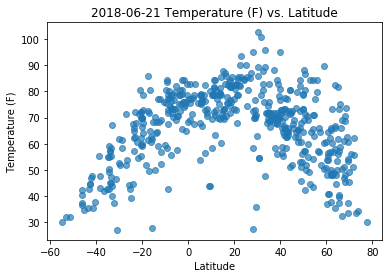

In [45]:
#Scatter plot (Temperature vs Latitude)

plt.scatter(weather_df['lat'],weather_df['temp'],alpha=0.675,marker='o')
plt.title("2018-06-21 Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("Results/Temperature")

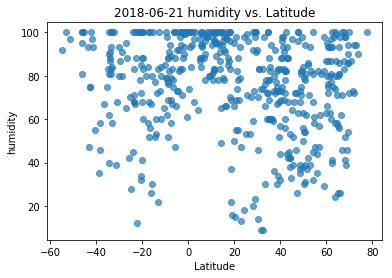

In [44]:
#Scatter plot (Humidity vs Latitude)
plt.scatter(weather_df['lat'],weather_df['humidity'],alpha=0.675,marker='o')
plt.title("2018-06-21 humidity vs. Latitude")
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.savefig("Results/Humidity")

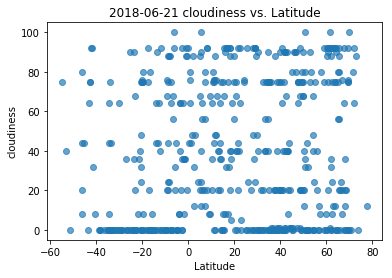

In [42]:
#Scatter plot (Cloudiness vs Latitude)
plt.scatter(weather_df['lat'],weather_df['cloudiness'],alpha=0.675,marker='o')
plt.title("2018-06-21 cloudiness vs. Latitude")
plt.ylabel("cloudiness")
plt.xlabel("Latitude")
plt.savefig("Results/Cloudiness")

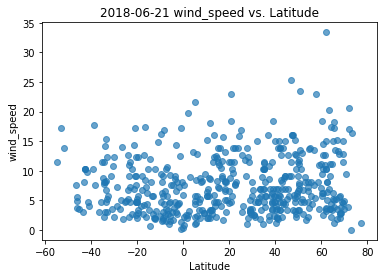

In [43]:
#Scatter plot (Wind_Speed vs Latitude)
plt.scatter(weather_df['lat'],weather_df['wind_speed'],alpha=0.675,marker='o')
plt.title("2018-06-21 wind_speed vs. Latitude")
plt.ylabel("wind_speed")
plt.xlabel("Latitude")
plt.savefig("Results/Wind_Speed")